In [1]:
# we will install the libraries using ``piplite``
import piplite
await piplite.install(['seaborn'])
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await piplite.install(['ipywidgets'])
await piplite.install(['tqdm'])



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 



# import the visualization package, seaborn:
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.metrics import r2_score


#import data

data = pd.read_csv("insurance.csv")





# 1. Data Preprocessing

In [2]:
#see the first 15 lines of data

print(data.head(15))


    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male     NaN  

## Handling missing values

In [3]:
# check how many values are missing (NaN) before we apply the methods below 

count_nan = data.isnull().sum()

In [4]:
print(count_nan[count_nan>0])

bmi    5
dtype: int64


In [5]:
#fill in the missing values 
data['bmi'].fillna(data['bmi'].mean(), inplace = True)

In [6]:
#check how many values are missing (NaN) - after we filled in the NaN
count_nan = data.isnull().sum() 

# the number of missing values for every column
print(count_nan[count_nan > 0])

Series([], dtype: int64)


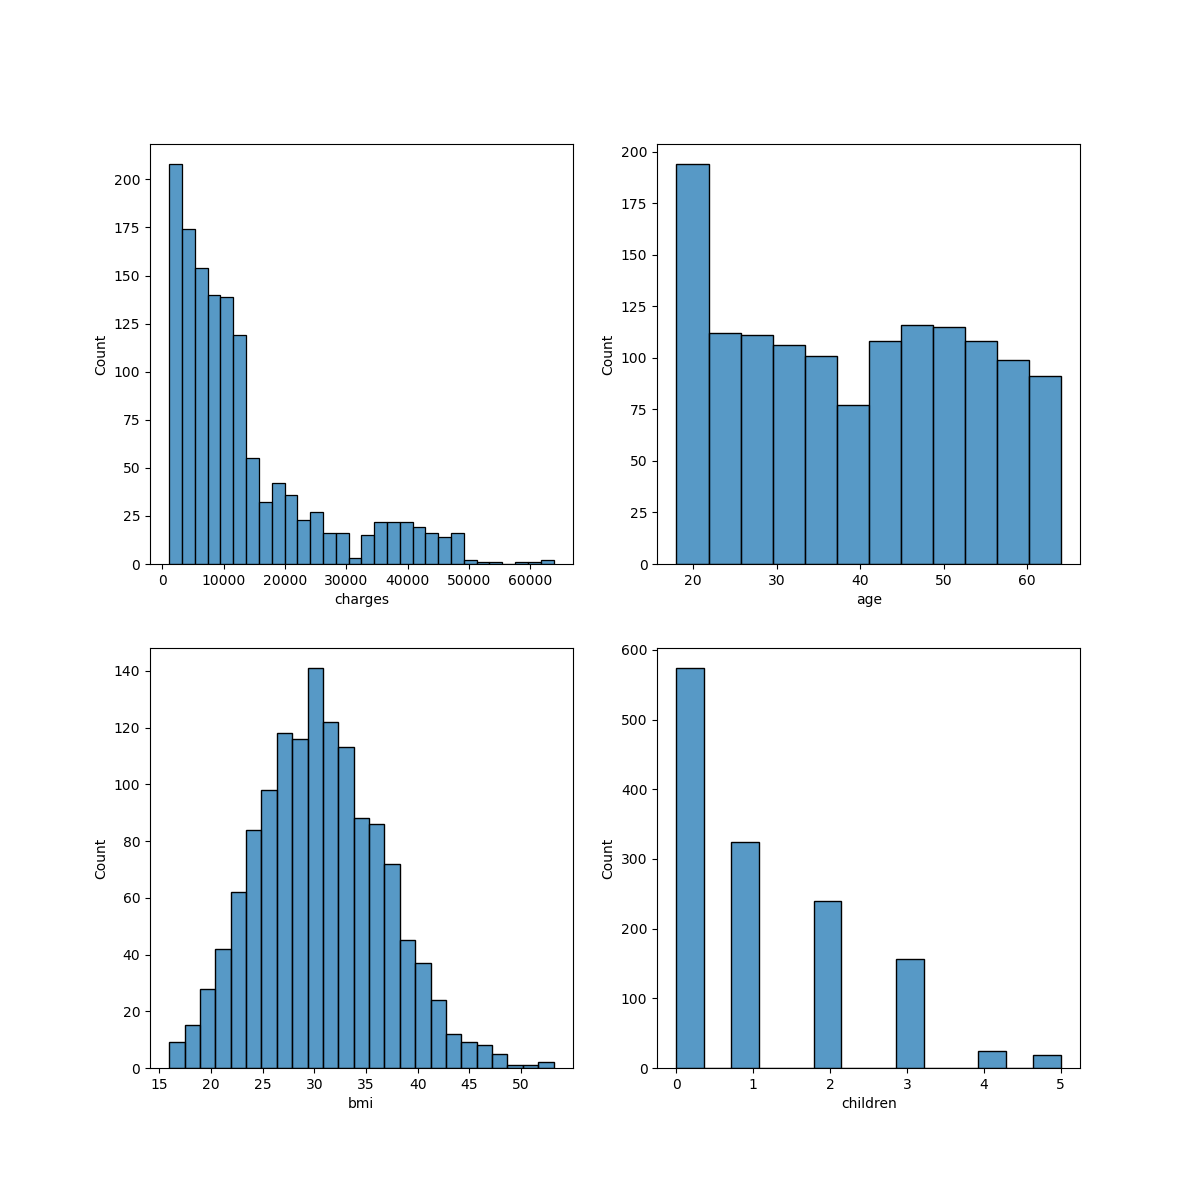

<Figure size 1200x1200 with 0 Axes>

In [7]:
figure, ax = plt.subplots(2,2, figsize=(12,12))

#See the distrubution of the data

sns.histplot(data['charges'],ax= ax[0,0])
sns.histplot(data['age'],ax=ax[0,1])
sns.histplot(data['bmi'],ax= ax[1,0])
sns.histplot(data['children'],ax= ax[1,1])

plt.show()

### Descriptive statistics:

#### Most of the Charges are at the lowest value of the range; The distribution shows a right hand skewness;
#### There's a higher number of people with 20 years' old;
#### Most people don't have children or just have one child


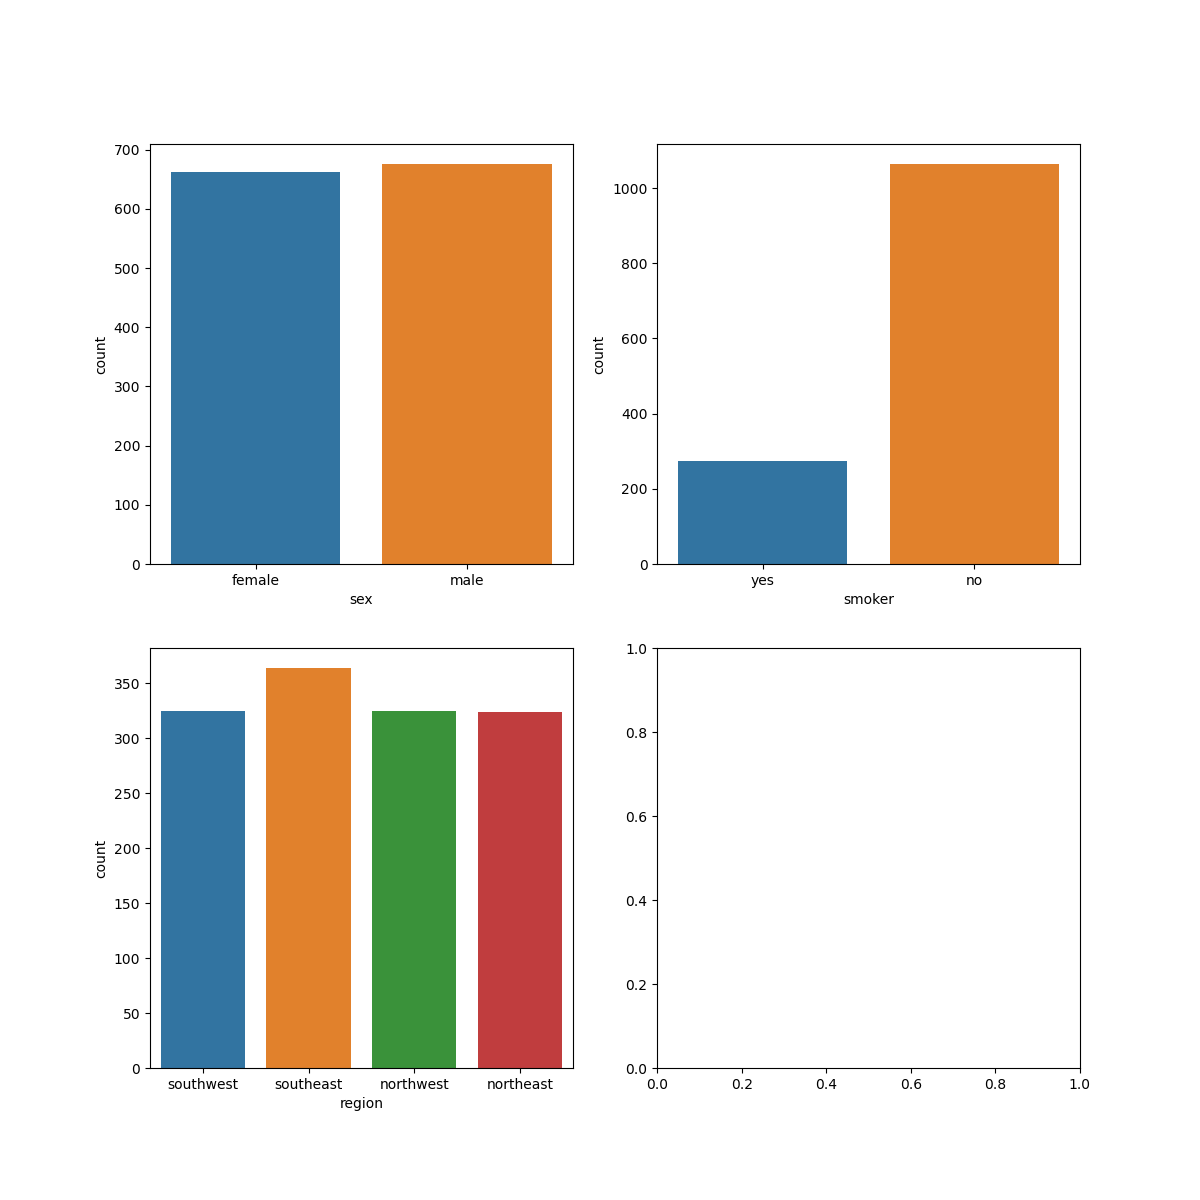

<Figure size 1200x1200 with 0 Axes>

In [8]:
figure, ax = plt.subplots(2,2, figsize=(12,12))

sns.countplot(x ='sex', data = data, ax= ax[0,0])
sns.countplot(x ='smoker', data = data, ax= ax[0,1])
sns.countplot(x ='region', data = data, ax= ax[1,0])

plt.show()

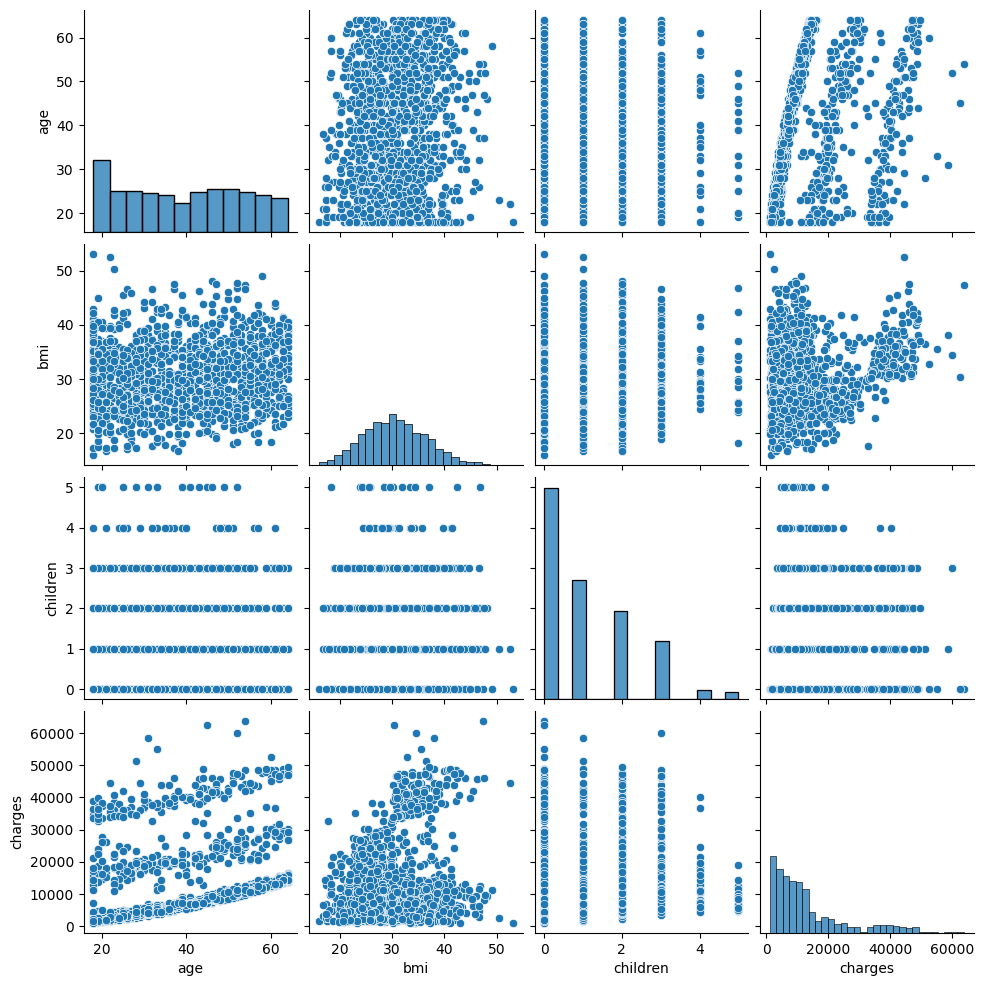

In [9]:
#visualizeing skewness
sns.pairplot(data)

#### We can see a positive correlation between Age and Charges

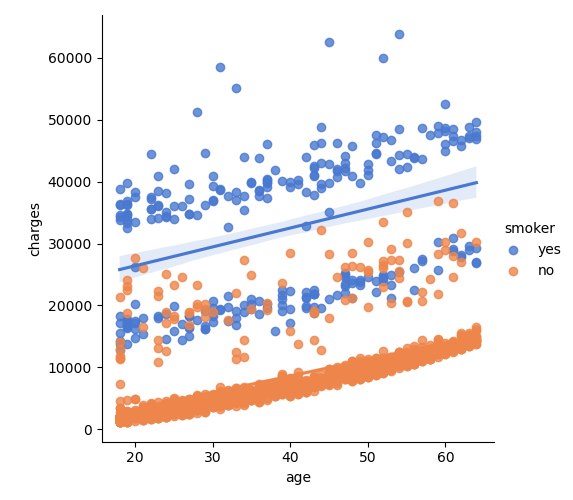

<Figure size 573.875x500 with 0 Axes>

In [10]:
#Lets look at smokers vs non-smokers on age vs charges:

sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette = 'muted', height = 5)
plt.show()

#### Looking more closely, older people and smokers face higher charges

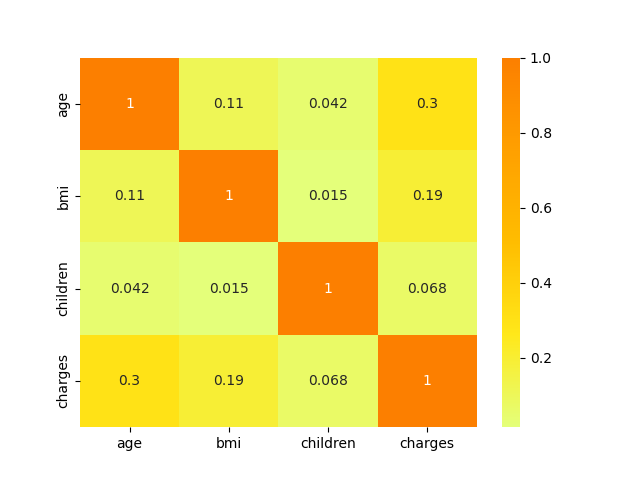

<Figure size 640x480 with 0 Axes>

In [11]:
#Lets look at correlation:

corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show()

#### The stronger positive correlation is between Age and Charges

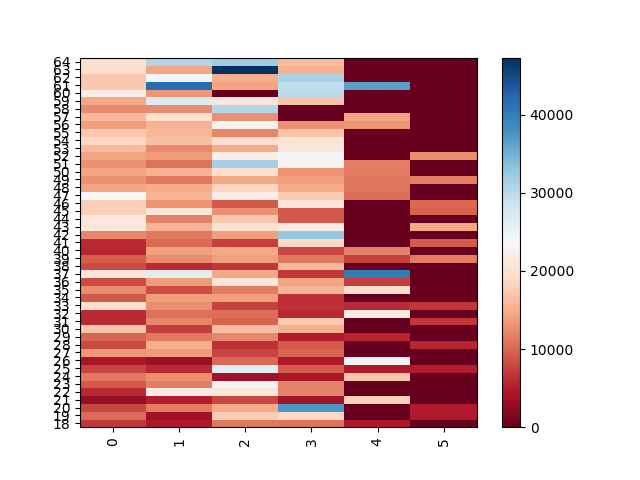

<Figure size 640x480 with 0 Axes>

In [12]:
# Let's use a heat map to visualize the relationship between GDP, Disembarked Passangers and Investment rate.


# grouping results

df_gptest = data[['age','children','charges']]
grouped_test1 = df_gptest.groupby(['age','children'],as_index=False).mean()
grouped_test1

grouped_pivot = grouped_test1.pivot(index='age',columns='children')
grouped_pivot

grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot



#use the grouped results

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### Oldest people with 1 to 4 children have higher charges

## Convert categorical data into numbers

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [14]:
### label encoding

In [15]:
#option2: sklearn label encoding: maps each category to a different integer

#create ndarray for label encodoing (sklearn)
sex = data.iloc[:,1:2].values
smoker = data.iloc[:,4:5].values

#label encoder = le

In [16]:
## le for sex

le = LabelEncoder()
sex[:,0] = le.fit_transform(sex[:,0])
sex = pd.DataFrame(sex)
sex.columns = ['sex']
le_sex_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for sex:")
print(le_sex_mapping)
print(sex[:10])

Sklearn label encoder results for sex:
{'female': 0, 'male': 1}
  sex
0   0
1   1
2   1
3   1
4   1
5   0
6   0
7   0
8   1
9   0


In [17]:
## le for smoker

le = LabelEncoder()
smoker[:,0] = le.fit_transform(smoker[:,0])
smoker = pd.DataFrame(smoker)
smoker.columns = ['smoker']
le_smoker_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Sklearn label encoder results for smoker:")
print(le_smoker_mapping)
print(smoker[:10])

Sklearn label encoder results for smoker:
{'no': 0, 'yes': 1}
  smoker
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0


In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
#option3: sklearn one hot encoding: maps each category to 0 (cold) or 1 (hot) 

#one hot encoder = ohe

#create ndarray for one hot encodoing (sklearn)
region = data.iloc[:,5:6].values #ndarray

## ohe for region
ohe = OneHotEncoder() 

region = ohe.fit_transform(region).toarray()
region = pd.DataFrame(region)
region.columns = ['northeast', 'northwest', 'southeast', 'southwest']
print("Sklearn one hot encoder results for region:")  
print(region[:10])



Sklearn one hot encoder results for region:
   northeast  northwest  southeast  southwest
0        0.0        0.0        0.0        1.0
1        0.0        0.0        1.0        0.0
2        0.0        0.0        1.0        0.0
3        0.0        1.0        0.0        0.0
4        0.0        1.0        0.0        0.0
5        0.0        0.0        1.0        0.0
6        0.0        0.0        1.0        0.0
7        0.0        1.0        0.0        0.0
8        1.0        0.0        0.0        0.0
9        0.0        1.0        0.0        0.0


## Divide the data into test and train

In [20]:
##take the numerical data from the original data

X_num = data[['age', 'bmi', 'children']].copy()

In [21]:
##take the encoded data and add to numerical data

X_final = pd.concat([X_num, region, sex, smoker], axis = 1)


In [22]:
#define y as being the "charges column" from the original dataset

y_final = data[['charges']].copy()

In [23]:
#Test train split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

In [24]:
## Feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [26]:
# normalized scaler (fit transform on train, fit only on test)

#n_scaler = MinMaxScaler()
#X_train = n_scaler.fit_transform(X_train.astype(float))
#X_test= n_scaler.transform(X_test.astype(float))

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
# standard scaler (fit transform on train, transform only on test)

s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test= s_scaler.transform(X_test.astype(float))

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Prediction Models

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [31]:
#print score

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [[ 3.56465559e+03  2.01930562e+03  6.23372673e+02  1.35769735e+17
   1.37781059e+17  1.43208209e+17  1.40704899e+17 -6.60588371e+01
   9.29776719e+03]]
lr.intercept_: [13146.6251436]
lr train score 0.728, lr test score: 0.786


## Polynomial regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures (degree = 2)
X_poly = poly.fit_transform(X_final)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y_final, test_size = 0.33, random_state = 0)

In [33]:
#standard scaler (fit transform on train, transform only on test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test= sc.transform(X_test.astype(float))

We're still fitting a linear model, but the features are polynomial here.

In [34]:
#fit model

poly_lr = LinearRegression().fit(X_train,y_train)

y_train_pred = poly_lr.predict(X_train)
y_test_pred = poly_lr.predict(X_test)

In [35]:
#print score

print('poly train score %.3f, poly test score: %.3f' % (
poly_lr.score(X_train,y_train),
poly_lr.score(X_test, y_test)))

poly train score 0.824, poly test score: 0.868


## Support Vector Regression (SVR)

In [37]:
svr = SVR(kernel='linear', C = 300)

In [38]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

In [39]:
#standard scaler (fit transform on train, transform only on test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test= sc.transform(X_test.astype(float))

In [40]:
#fit model

svr = svr.fit(X_train,y_train.values.ravel())
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

In [41]:
#print score

print('svr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))

svr train score 0.598, svr test score: 0.628


## Decision tree regression

In [42]:
dt = DecisionTreeRegressor(random_state=0)

In [43]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

In [44]:
#standard scaler (fit transform on train, transform only on test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test= sc.transform(X_test.astype(float))

In [45]:
#fit model

dt = dt.fit(X_train,y_train.values.ravel())
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [46]:
#print score

print('dt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

dt train score 0.999, dt test score: 0.701


In [47]:
y_test_pred[0:5]

array([10085.846  ,  8233.0975 , 43753.33705, 13429.0354 ,  9855.1314 ])

## Random Forest

In [48]:
#  There are a few different parameters in this regressor, such as n_estimators, criterion, et cetera. Although they require a lot more time to digest, in summary, n_estimators is the number of trees. Criterion is the feature selection criteria here. We are using the default one, so we can also not specify it and Python will still take it as mse, which is the mean squared error.
# n_jobs is the number of jobs to run in parallel for both fit and predict. Minus one means use all processors

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

In [49]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

In [50]:
#standard scaler (fit transform on train, transform only on test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test= sc.transform(X_test.astype(float))

In [51]:
#fit model

forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [52]:
#print score

print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

forest train score 0.973, forest test score: 0.858


### The model which reaches a highest score is the Random Forest. The lowest score was on the SVR model.

## Hyperparameter optimization

In [53]:
### Challenge 1

In [54]:
#Function to print best hyperparamaters: 

def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()

In [55]:
#test train split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state = 0 )

In [56]:
#standard scaler (fit transform on train, transform only on test)

sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(float))
X_test= sc.transform(X_test.astype(float))

In [57]:
###Challenge 1: SVR parameter grid###

param_grid_svr = dict(kernel=[ 'linear', 'poly'],
                     degree=[2],
                     C=[600, 700, 800, 900],
                     epsilon=[0.0001, 0.00001, 0.000001])
svr = GridSearchCV(SVR(), param_grid=param_grid_svr, cv=5, verbose=3)

In [58]:
#fit model

svr = svr.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.671 total time=   0.1s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.663 total time=   0.1s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.571 total time=   0.1s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.636 total time=   0.1s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=linear;, score=0.555 total time=   0.1s
[CV 1/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.485 total time=   0.0s
[CV 2/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.336 total time=   0.0s
[CV 3/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.278 total time=   0.0s
[CV 4/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.372 total time=   0.0s
[CV 5/5] END C=600, degree=2, epsilon=0.0001, kernel=poly;, score=0.222 total time=   0.0s
[CV 1/5] END C=600

In [59]:
#print score

print('\n\nsvr train score %.3f, svr test score: %.3f' % (
svr.score(X_train,y_train),
svr.score(X_test, y_test)))
#print(svr.best_estimator_.get_params())



svr train score 0.683, svr test score: 0.734


#### Hyperparameter optimization for SVC increased the score both in train and test

In [ ]:
### Challenge 2: Decision Tree parameter grid

In [61]:
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )

dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_dt, cv=5,  verbose=3)



#fit model
dt = dt.fit(X_train,y_train.values.ravel())


#print score
print('\n\ndt train score %.3f, dt test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))
print_best_params(dt)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.817 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=9;, score=0.796 total time=   0.0s
[CV 1/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.818 total time=   0.0s
[CV 2/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.819 total time=   0.0s
[CV 3/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.846 total time=   0.0s
[CV 4/5] END max_depth=4, min_impurity_decrease=0, min_samples_leaf=10;, score=0.815 total time=   0.0s
[CV 5/5

#### Hyperparameter optimization for Decision Tree increased the score in test

In [ ]:
### Challenge 3: Random Forest parameter grid

In [ ]:
param_grid_rf = dict(n_estimators=[20],
                     max_depth=np.arange(1, 13, 2),
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(1, 15, 2, int),
                     bootstrap=[True, False],
                     oob_score=[False, ])


forest = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(X_train,y_train.values.ravel())


#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.616 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.454 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.646 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.595 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.582 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=3, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.616 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, mi